### TASK 1:
1. Let’s consider the classification problem in https://archive.ics.uci.edu/dataset/76/nursery, which is a 
8-features, 3-classes dataset.  It is mentioned in the link that the expected performance of over 90%
accuracy (See Baseline Model Performance).  Let’s add the following model performan e outcom  
to the baseli:  
4. 
Decision Tree (categorical f;tures) 
Decision Tree (categorical features in one-hot encod;d form) 
Logistic Regression with L1 regul;rization 
k-Neares.t 2. Neighbors 
You are expected to split the data into train, val & test.  Use the val partition o tune the 
hyperparameters such as (but not limited to) k of kNN, height of DT, or lambda of L1 r. Remember, 
there are several other hyper3.  parameters. 
Report the performance of the test-data.  Create a similar visualization with 9 metods now, with 
your additional 4 methods.  The plot shows the mean and variance, FYI.  Use a suitabl visualization 
meod to get them.  You may wonder; to compute variance, you need more 
4. mples.  
Right.  Repeat this task 5 times to get the mean and variance. :) variance. :) 

In [5]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

In [24]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/nursery/nursery.data"
column_names = ['parents', 'has_nurs', 'form', 'children', 'housing', 'finance', 'social', 'health', 'class']
data = pd.read_csv(url, names=column_names)
data.head()


,parents,has_nurs,form,children,housing,finance,social,health,class
0,usual,proper,complete,1,convenient,convenient,nonprob,recommended,recommend
1,usual,proper,complete,1,convenient,convenient,nonprob,priority,priority
2,usual,proper,complete,1,convenient,convenient,nonprob,not_recom,not_recom
3,usual,proper,complete,1,convenient,convenient,slightly_prob,recommended,recommend
4,usual,proper,complete,1,convenient,convenient,slightly_prob,priority,priority


In [25]:
data.describe()

,parents,has_nurs,form,children,housing,finance,social,health,class
count,12960,12960,12960,12960,12960,12960,12960,12960,12960
unique,3,5,4,4,3,2,3,3,5
top,usual,proper,complete,1,convenient,convenient,nonprob,recommended,not_recom
freq,4320,2592,3240,3240,4320,6480,4320,4320,4320


In [26]:
X = data.iloc[:, :-1]
y = data.iloc[:, -1]

In [7]:
# One-hot encode the categorical features for certain models
encoder = OneHotEncoder()
X_encoded = encoder.fit_transform(X)



In [8]:
#  split
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)


In [9]:
# Label encode the categorical features for Decision Tree with categorical handling
label_encoders = {}
X_label_encoded = X.copy()
for column in X_label_encoded.columns:
    le = LabelEncoder()
    X_label_encoded[column] = le.fit_transform(X_label_encoded[column])
    label_encoders[column] = le  # Save label encoders for possible inverse transformation later


In [10]:
# Non-stratified split for label-encoded Decision Tree
X_train_cat, X_temp_cat, y_train_cat, y_temp_cat = train_test_split(X_label_encoded, y, test_size=0.4, random_state=42)
X_val_cat, X_test_cat, y_val_cat, y_test_cat = train_test_split(X_temp_cat, y_temp_cat, test_size=0.5, random_state=42)

In [11]:
# Train Decision Tree with categorical features (label encoded)
dt_cat = DecisionTreeClassifier()
dt_cat.fit(X_train_cat, y_train_cat)
y_pred_dt_cat = dt_cat.predict(X_test_cat)
accuracy_dt_cat = accuracy_score(y_test_cat, y_pred_dt_cat)

In [12]:
# Train Decision Tree with one-hot encoded features
X_train_encoded, X_val_encoded, X_test_encoded = encoder.transform(X_train), encoder.transform(X_val), encoder.transform(X_test)
dt_onehot = DecisionTreeClassifier()
dt_onehot.fit(X_train_encoded, y_train)
y_pred_dt_onehot = dt_onehot.predict(X_test_encoded)
accuracy_dt_onehot = accuracy_score(y_test, y_pred_dt_onehot)

In [13]:
# Train Logistic Regression with L1 regularization
log_reg = LogisticRegression(penalty='l1', solver='liblinear')
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10]}
log_reg_cv = GridSearchCV(log_reg, param_grid, cv=5)
log_reg_cv.fit(X_train_encoded, y_train)
y_pred_log_reg = log_reg_cv.predict(X_test_encoded)
accuracy_log_reg = accuracy_score(y_test, y_pred_log_reg)

In [14]:
# Train k-Nearest Neighbors
knn = KNeighborsClassifier()
param_grid_knn = {'n_neighbors': [3, 5, 7, 9], 'metric': ['euclidean', 'manhattan']}
knn_cv = GridSearchCV(knn, param_grid_knn, cv=5)
knn_cv.fit(X_train_encoded, y_train)
y_pred_knn = knn_cv.predict(X_test_encoded)
accuracy_knn = accuracy_score(y_test, y_pred_knn)


In [23]:
# Repeating the experiment 5 times and reporting the mean and variance of the accuracy
n_experiments = 5
accuracies = {'dt_cat': [], 'dt_onehot': [], 'log_reg': [], 'knn': []}

for _ in range(n_experiments):
    # Non-stratified split
    X_train, X_temp, y_train, y_temp = train_test_split(X_encoded, y, test_size=0.4, random_state=42)
    X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

    X_train_cat, X_temp_cat, y_train_cat, y_temp_cat = train_test_split(X_label_encoded, y, test_size=0.4, random_state=42)
    X_val_cat, X_test_cat, y_val_cat, y_test_cat = train_test_split(X_temp_cat, y_temp_cat, test_size=0.5, random_state=42)
    
    # Decision Tree (Categorical with label encoding)
    dt_cat.fit(X_train_cat, y_train_cat)
    accuracies['dt_cat'].append(accuracy_score(y_test_cat, dt_cat.predict(X_test_cat)))
    
    # Decision Tree (One-hot Encoded)
    dt_onehot.fit(X_train, y_train)
    accuracies['dt_onehot'].append(accuracy_score(y_test, dt_onehot.predict(X_test)))
    
    # Logistic Regression (L1)
    log_reg_cv.fit(X_train, y_train)
    accuracies['log_reg'].append(accuracy_score(y_test, log_reg_cv.predict(X_test)))
    
    # kNN
    knn_cv.fit(X_train, y_train)
    accuracies['knn'].append(accuracy_score(y_test, knn_cv.predict(X_test)))

# Calculate mean and variance for each model
mean_accuracies = {key: np.mean(val) for key, val in accuracies.items()}
var_accuracies = {key: np.var(val) for key, val in accuracies.items()}
# Visualization (bar plot with error bars)
models = ['Decision Tree (Cat)', 'Decision Tree (One-Hot)', 'Logistic Regression (L1)', 'kNN']
means = [mean_accuracies['dt_cat'], mean_accuracies['dt_onehot'], mean_accuracies['log_reg'], mean_accuracies['knn']]
variances = [var_accuracies['dt_cat'], var_accuracies['dt_onehot'], var_accuracies['log_reg'], var_accuracies['knn']]



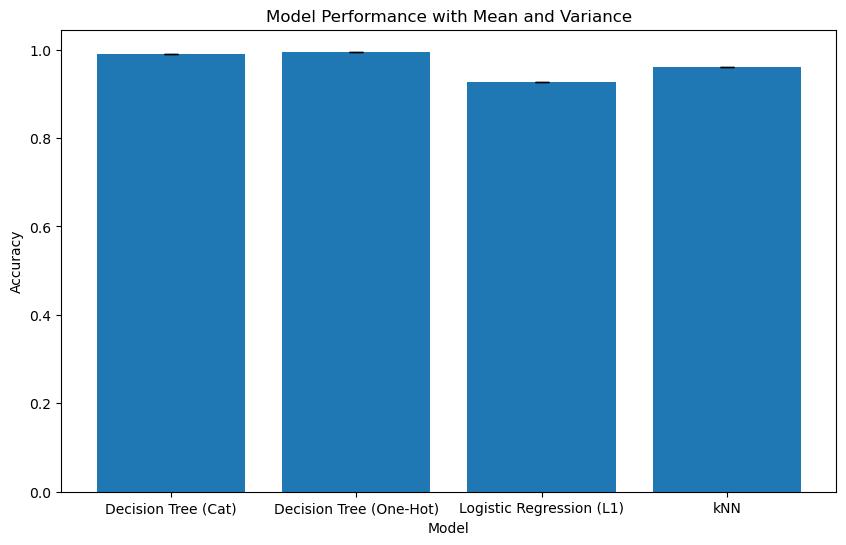

In [22]:
plt.figure(figsize=(10,6))
plt.bar(models, means, yerr=np.sqrt(variances), capsize=5)
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Model Performance with Mean and Variance')
plt.show()

## Observations of task 1:

##### Model selection
1. Decision Tree (with categorical features)
Decision Trees can natively handle categorical features by splitting on different categories without any transformation or encoding. The performance of the Decision Tree model largely depends on the maximum depth.
2. Decision Tree (with one-hot encoded features)
In this scenario, we first applied One-Hot Encoding to the categorical features. One-Hot Encoding transforms each categorical feature into a set of binary (0/1) features.
One-Hot Encoding increases the dimensionality of the feature space, making the dataset more complex for models like Decision Trees.
3. Logistic Regression (with L1 regularization)
Logistic Regression requires numerical features, so we applied One-Hot Encoding to handle the categorical variables. We also used L1 regularization (Lasso) to perform feature selection by shrinking irrelevant feature coefficients to zero.
4. k-Nearest Neighbors (kNN)
kNN requires numerical features to compute the distance between instances, so categorical features were again one-hot encoded. The model classifies a data point based on the majority class among its k nearest neighbors.
##### Evaluation:
1. Decision Trees (categorical features): Performed well, especially because they can natively handle categorical features, making them ideal for this type of dataset.
2. Decision Trees (with one-hot encoding): Performance could be impacted by the increase in dimensionality due to one-hot encoding, potentially leading to overfitting.
3. Logistic Regression: With L1 regularization, it can achieve good performance if the dataset is linearly separable. However, since the dataset is mostly categorical, Logistic Regression may not perform as well as tree-based methods.
4. kNN: Performance depends heavily on the choice of k and proper scaling of the features. When tuned properly, kNN can perform well, but it's sensitive to noise in the data.
##### Overall conclusion :
1. Tree-based models generally perform better on datasets with categorical features due to their ability to split based on categories directly.
2. Logistic Regression works well if the data is linearly separable or close to linear, but struggles with non-linear decision boundaries.
3. kNN can provide good performance but requires careful feature scaling and tuning of k.


## TASK 2


You may notice that the shape of logistic regression decision boundary and a sigmoid are a look-alike.  
We know that range of sigmoid is 0 to 1, which means, we can use sigmoid only when outputs are 
unipolar.  Here are some simple extensions, we may try.  
1. Construct a bipolar_sigmoid(x) using unipolar sigmoid. 
2. A popular bipolar normalizer is tanh(x). Compare the reponse of tanh(x) vs your 
bipolar_sigmoid(x). 
3. Parameterize it as bipolar_sigmoid(ax), tanh(ax); You may plot the shapes of the response at 
different values of ‘a’ in [-5, -1, -.1, -.01, .001, .01, .1, 1, 5]. 
4. Now comes the interesting part.  Can you evaluate the linear range of ‘x’ for each value of ‘a’ in 
bipolar_sigmoid(ax)? Usually, when ‘a’ is small, the linearity range is high.

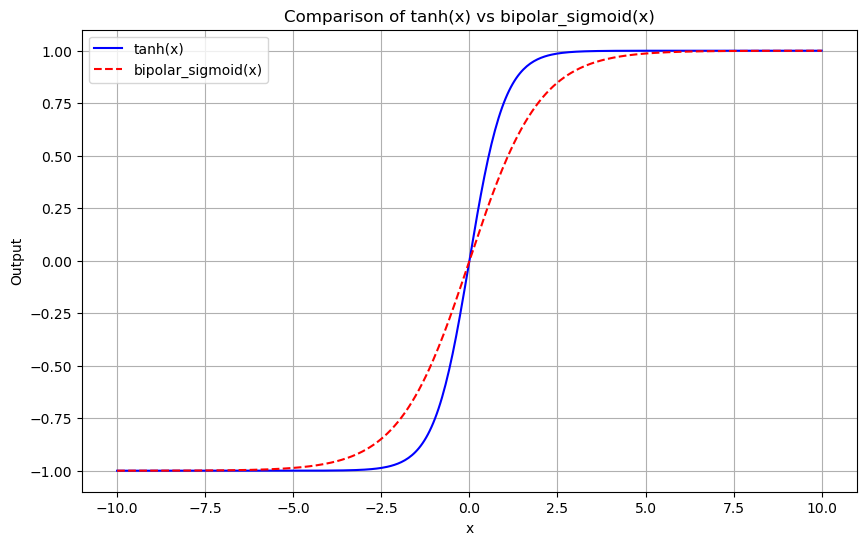

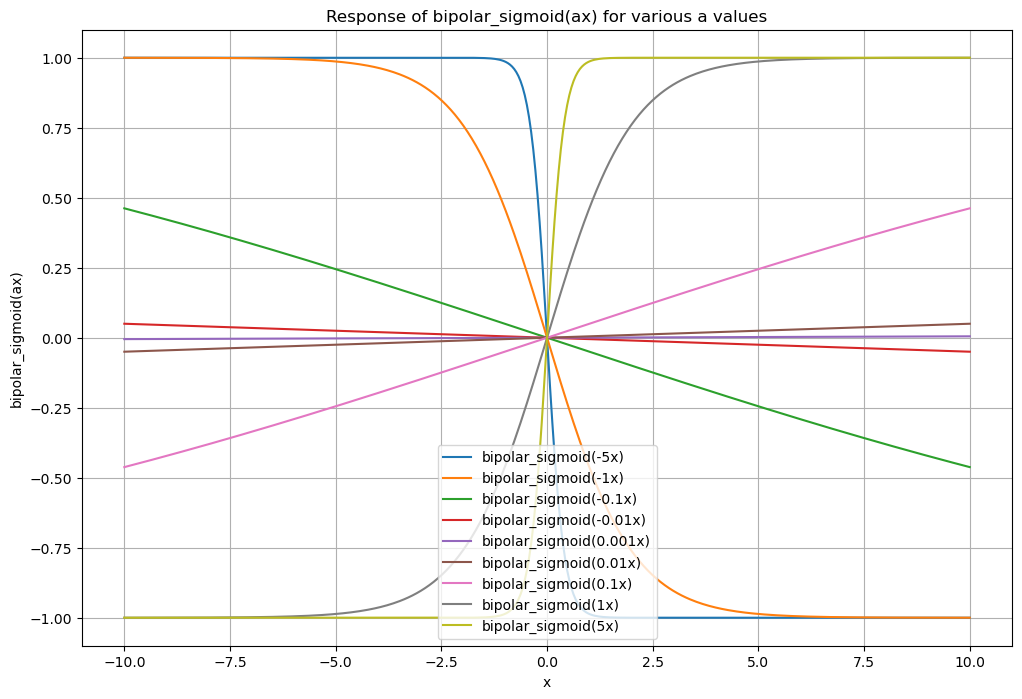

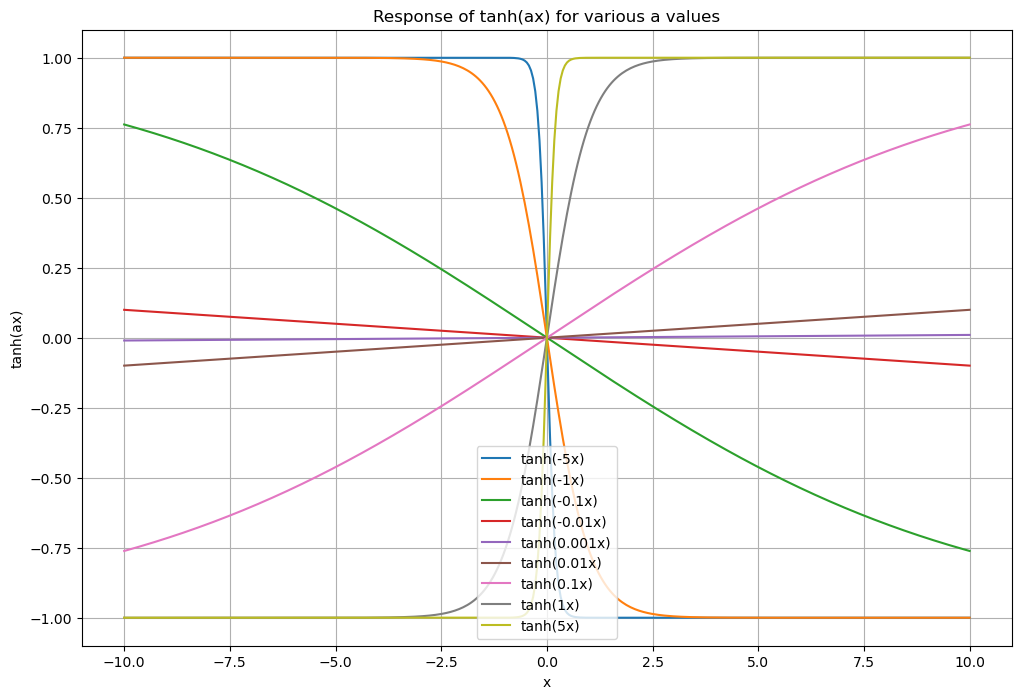

Linearity Range for bipolar_sigmoid(ax):
a = -5: Linear Range = (-0.02506265664160523, 0.025062656641603454)
a = -1: Linear Range = (-0.2756892230576451, 0.2756892230576433)
a = -0.1: Linear Range = (-9.598997493734336, 9.598997493734334)
a = -0.01: Linear Range = (-10.0, 10.0)
a = 0.001: Linear Range = (-10.0, 10.0)
a = 0.01: Linear Range = (-10.0, 10.0)
a = 0.1: Linear Range = (-9.598997493734336, 9.598997493734334)
a = 1: Linear Range = (-0.2756892230576451, 0.2756892230576433)
a = 5: Linear Range = (-0.02506265664160523, 0.025062656641603454)


In [16]:
# Define the unipolar sigmoid function
def unipolar_sigmoid(x):
    return 1 / (1 + np.exp(-x))

# Task 2.1: Constructing a bipolar_sigmoid(x) using unipolar sigmoid
def bipolar_sigmoid(x):
    return 2 * unipolar_sigmoid(x) - 1  # Scales and shifts the unipolar sigmoid

# Task 2.2: Compare tanh(x) vs bipolar_sigmoid(x)
x_values = np.linspace(-10, 10, 400)  # Range of x values

# Calculate the response for tanh(x) and bipolar_sigmoid(x)
tanh_values = np.tanh(x_values)
bipolar_sigmoid_values = bipolar_sigmoid(x_values)

# Plot the comparison between tanh(x) and bipolar_sigmoid(x)
plt.figure(figsize=(10, 6))
plt.plot(x_values, tanh_values, label='tanh(x)', color='blue')
plt.plot(x_values, bipolar_sigmoid_values, label='bipolar_sigmoid(x)', color='red', linestyle='--')
plt.title('Comparison of tanh(x) vs bipolar_sigmoid(x)')
plt.xlabel('x')
plt.ylabel('Output')
plt.legend()
plt.grid(True)
plt.show()

# Task 2.3: Parameterize the functions as bipolar_sigmoid(ax) and tanh(ax)
a_values = [-5, -1, -0.1, -0.01, 0.001, 0.01, 0.1, 1, 5]

plt.figure(figsize=(12, 8))
for a in a_values:
    plt.plot(x_values, bipolar_sigmoid(a * x_values), label=f'bipolar_sigmoid({a}x)')
plt.title('Response of bipolar_sigmoid(ax) for various a values')
plt.xlabel('x')
plt.ylabel('bipolar_sigmoid(ax)')
plt.legend()
plt.grid(True)
plt.show()

plt.figure(figsize=(12, 8))
for a in a_values:
    plt.plot(x_values, np.tanh(a * x_values), label=f'tanh({a}x)')
plt.title('Response of tanh(ax) for various a values')
plt.xlabel('x')
plt.ylabel('tanh(ax)')
plt.legend()
plt.grid(True)
plt.show()

# Task 2.4: Evaluate the linear range of ‘x’ for each value of ‘a’ in bipolar_sigmoid(ax)
def compute_linearity_range(a, threshold=0.01):
    """Computing the linearity range for bipolar_sigmoid(ax) where slope is approximately linear."""
    x_values = np.linspace(-10, 10, 400)
    sigmoid_values = bipolar_sigmoid(a * x_values)
    
    # Compute the derivative (numerical approximation of slope)
    slopes = np.gradient(sigmoid_values, x_values)
    
    # Find indices where slope is approximately constant (within the threshold)
    linear_indices = np.where(np.abs(slopes - slopes[len(slopes) // 2]) < threshold)[0]
    
    # Return the x-range where it's approximately linear
    if len(linear_indices) > 0:
        linear_range = (x_values[linear_indices[0]], x_values[linear_indices[-1]])
    else:
        linear_range = (None, None)  # No linear range found within the threshold
    
    return linear_range


print("Linearity Range for bipolar_sigmoid(ax):")
for a in a_values:
    linear_range = compute_linearity_range(a)
    print(f"a = {a}: Linear Range = {linear_range}")


### Observations(Task 2):
##### Bipolar Sigmoid vs. Tanh:
Both functions serve similar purposes when output ranges are needed to be between -1 and 1, but tanh is typically preferred for faster gradient flow in optimization.
The bipolar sigmoid provides a softer, more gradual transition between values and could be useful in cases where more subtle non-linearity is desired.

##### Linearity Range:
As we can see the linearity range decreases as a increases, meaning smaller a values yield more linear behavior over a broader range of inputs.
This knowledge can be useful in designing neural networks or other models, where the choice of activation function and its parameterization directly impacts model performance.

